# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
import requests

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&appid={weather_api_key}&q={city}&units={units}"
    #city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    units = "metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | pingliang
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | forster
Processing Record 6 of Set 1 | talnakh
Processing Record 7 of Set 1 | sitka
Processing Record 8 of Set 1 | pisco
Processing Record 9 of Set 1 | badger
Processing Record 10 of Set 1 | qaqortoq
Processing Record 11 of Set 1 | flying fish cove
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | shingu
Processing Record 14 of Set 1 | puerto lempira
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | walvis bay
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 of Set 1 | hir

Processing Record 43 of Set 4 | ust-nera
Processing Record 44 of Set 4 | saint-philippe
Processing Record 45 of Set 4 | tazovsky
Processing Record 46 of Set 4 | ontinyent
Processing Record 47 of Set 4 | labuan
Processing Record 48 of Set 4 | tabuk
Processing Record 49 of Set 4 | at taj
Processing Record 0 of Set 5 | melitopol
Processing Record 1 of Set 5 | pinhao
Processing Record 2 of Set 5 | chernyshevskiy
Processing Record 3 of Set 5 | parakou
Processing Record 4 of Set 5 | hailin
Processing Record 5 of Set 5 | hilo
Processing Record 6 of Set 5 | bonga
Processing Record 7 of Set 5 | quellon
Processing Record 8 of Set 5 | benguela
Processing Record 9 of Set 5 | puerto ayora
Processing Record 10 of Set 5 | fale old settlement
Processing Record 11 of Set 5 | malvan
Processing Record 12 of Set 5 | daru
Processing Record 13 of Set 5 | zakamensk
Processing Record 14 of Set 5 | ancud
Processing Record 15 of Set 5 | mammoth lakes
Processing Record 16 of Set 5 | grantsville
Processing Record

City not found. Skipping...
Processing Record 36 of Set 8 | tshabong
Processing Record 37 of Set 8 | zacharo
Processing Record 38 of Set 8 | neuss
Processing Record 39 of Set 8 | racconigi
Processing Record 40 of Set 8 | phongsali
Processing Record 41 of Set 8 | bilaspur
Processing Record 42 of Set 8 | college
Processing Record 43 of Set 8 | portoviejo
Processing Record 44 of Set 8 | borba
Processing Record 45 of Set 8 | sinabang
Processing Record 46 of Set 8 | cozumel
Processing Record 47 of Set 8 | datong
Processing Record 48 of Set 8 | nuku'alofa
Processing Record 49 of Set 8 | manismata
Processing Record 0 of Set 9 | orlu
Processing Record 1 of Set 9 | taksimo
Processing Record 2 of Set 9 | rongelap
Processing Record 3 of Set 9 | gundlupet
Processing Record 4 of Set 9 | fomboni
Processing Record 5 of Set 9 | sault ste. marie
Processing Record 6 of Set 9 | vanimo
Processing Record 7 of Set 9 | mpika
Processing Record 8 of Set 9 | castillos
Processing Record 9 of Set 9 | isla vista
P

Processing Record 20 of Set 12 | kiunga
Processing Record 21 of Set 12 | balkanabat
Processing Record 22 of Set 12 | severoural'sk
Processing Record 23 of Set 12 | canico
Processing Record 24 of Set 12 | acarau
Processing Record 25 of Set 12 | koshki
Processing Record 26 of Set 12 | berezovyy
Processing Record 27 of Set 12 | vorgashor
Processing Record 28 of Set 12 | shihezi
Processing Record 29 of Set 12 | aripuana
Processing Record 30 of Set 12 | sao vicente
Processing Record 31 of Set 12 | yirol
City not found. Skipping...
Processing Record 32 of Set 12 | po
City not found. Skipping...
Processing Record 33 of Set 12 | pachino
Processing Record 34 of Set 12 | ondjiva
Processing Record 35 of Set 12 | vuktyl
Processing Record 36 of Set 12 | konosha
Processing Record 37 of Set 12 | cienfuegos
Processing Record 38 of Set 12 | vizinga
Processing Record 39 of Set 12 | alo
Processing Record 40 of Set 12 | rikaze
Processing Record 41 of Set 12 | san andros
City not found. Skipping...
Process

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san patricio,28.0170,-97.5169,9.39,94,100,2.93,US,1705572609
1,edinburgh of the seven seas,-37.0676,-12.3116,17.50,86,100,11.51,SH,1705572609
2,pingliang,35.5392,106.6861,0.00,83,98,2.48,CN,1705572610
3,ribeira grande,38.5167,-28.7000,14.32,62,75,9.26,PT,1705572610
4,forster,-32.1667,152.5167,26.83,86,46,3.41,AU,1705572610


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,9.39,94,100,2.93,US,1705572609
1,edinburgh of the seven seas,-37.0676,-12.3116,17.50,86,100,11.51,SH,1705572609
2,pingliang,35.5392,106.6861,0.00,83,98,2.48,CN,1705572610
3,ribeira grande,38.5167,-28.7000,14.32,62,75,9.26,PT,1705572610
4,forster,-32.1667,152.5167,26.83,86,46,3.41,AU,1705572610


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

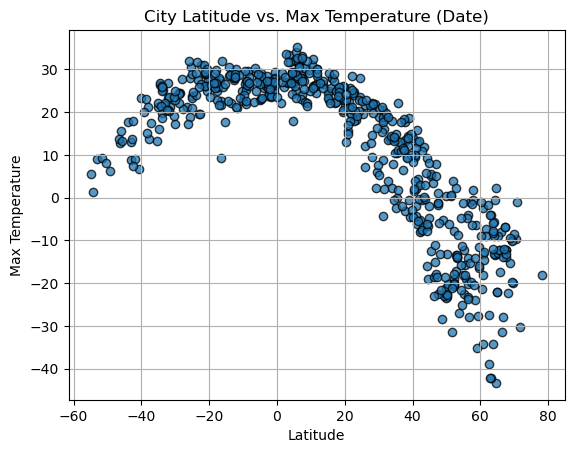

In [22]:
# Build scatter plot for latitude vs. temperature
latitudes = [city["Lat"] for city in city_data]
temperatures = [city["Max Temp"] for city in city_data]

plt.scatter(latitudes, temperatures, edgecolors="black", marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

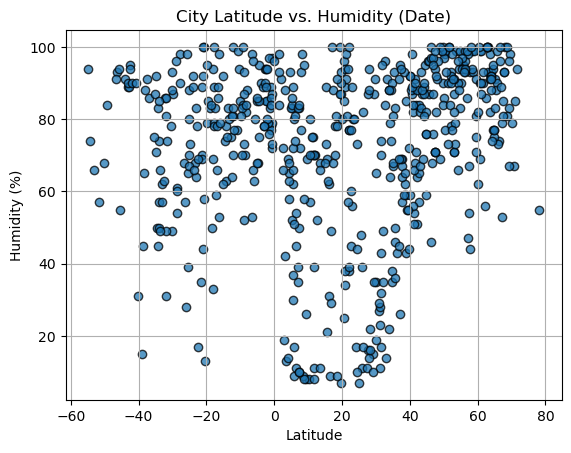

In [23]:
# Build the scatter plots for latitude vs. humidity
humidities = [city["Humidity"] for city in city_data]
plt.scatter(latitudes, humidities, edgecolors="black", marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

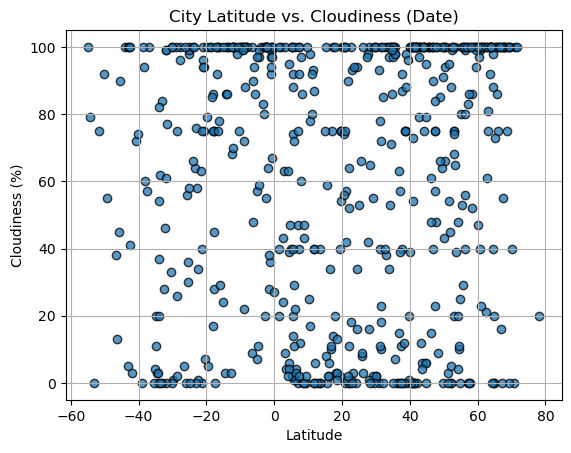

In [24]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = [city["Cloudiness"] for city in city_data]

plt.scatter(latitudes, cloudiness, edgecolors="black", marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("output_data/Fig3.png")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

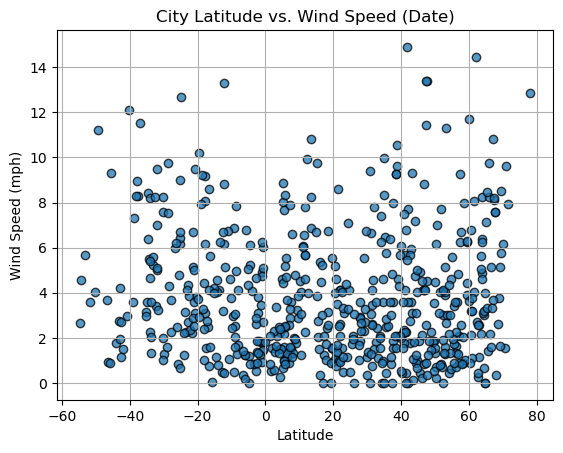

In [25]:
# Build the scatter plots for latitude vs. wind speed
wind_speeds = [city["Wind Speed"] for city in city_data]
plt.scatter(latitudes, wind_speeds, edgecolors="black", marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Save the figure
plt.savefig("output_data/Fig4.png")
plt.grid(True)

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Create regression line
    regression_line = slope * x_values + intercept



In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame([city for city in city_data if city["Lat"] >= 0])
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san patricio,28.0170,-97.5169,9.39,94,100,2.93,US,1705572609
1,pingliang,35.5392,106.6861,0.00,83,98,2.48,CN,1705572610
2,ribeira grande,38.5167,-28.7000,14.32,62,75,9.26,PT,1705572610
3,talnakh,69.4865,88.3972,-19.89,98,100,5.78,RU,1705572408
4,sitka,57.0531,-135.3300,-1.06,47,0,2.06,US,1705572610


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame([city for city in city_data if city["Lat"] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,17.50,86,100,11.51,SH,1705572609
1,forster,-32.1667,152.5167,26.83,86,46,3.41,AU,1705572610
2,pisco,-13.7000,-76.2167,22.03,83,100,4.12,PE,1705572610
3,flying fish cove,-10.4217,105.6791,24.82,94,75,4.63,CX,1705572610
4,ushuaia,-54.8000,-68.3000,5.62,94,100,2.67,AR,1705572611


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.78701993543133


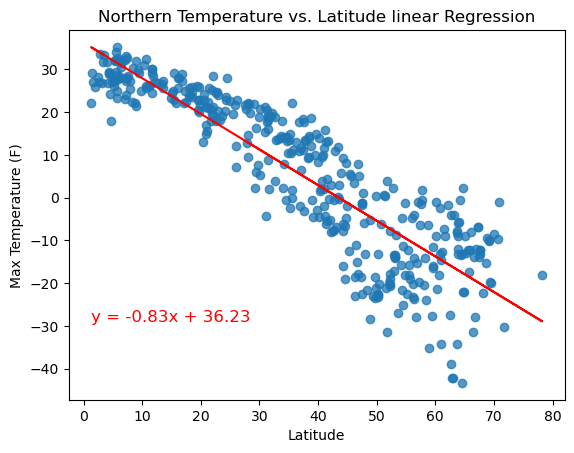

In [29]:
# Linear regression on Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern_temperature = northern_hemi_df["Max Temp"]
# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values_northern, y_values_northern_temperature)
regression_line = slope * x_values_northern + intercept

# Create scatter plot
plt.scatter(x_values_northern, y_values_northern_temperature, marker="o", alpha=0.75)
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot regression line in red
plt.plot(x_values_northern, regression_line, "r")



# Incorporate the other graph properties
plt.text(x_values_northern.min(), regression_line.min(), equation, fontsize=12, color="red")
plt.title("Northern Temperature vs. Latitude linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# Print r value
print(f"The r-value is: {r_value**2}")
plt.show()

The r-value is: 0.45063218588877113


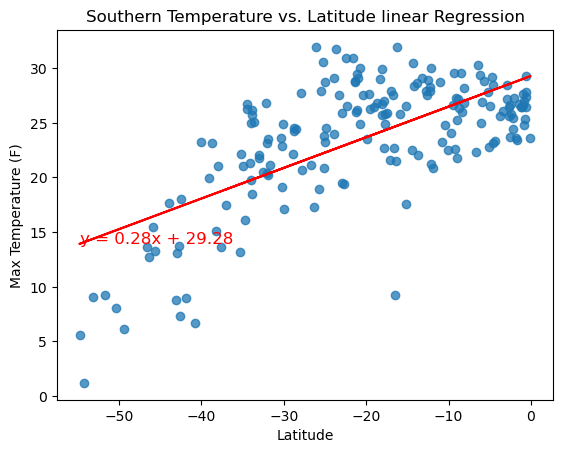

In [30]:
# Linear regression on Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern_temperature = southern_hemi_df["Max Temp"]
# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values_southern, y_values_southern_temperature)
regression_line = slope * x_values_southern + intercept

# Create scatter plot
plt.scatter(x_values_southern, y_values_southern_temperature, marker="o", alpha=0.75)
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot regression line in red
plt.plot(x_values_southern, regression_line, "r")

# Incorporate the other graph properties
plt.text(x_values_southern.min(), regression_line.min(), equation, fontsize=12, color="red")
plt.title("Southern Temperature vs. Latitude linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# Print r value
print(f"The r-value is: {r_value**2}")
plt.show()

1. **Northern Hemisphere:**
   - **Linear Regression Equation:** y = -0.83x + 36.23
   - **Correlation Coefficient (r-value):** 0.78701993543133

   In the Northern Hemisphere, there is a moderate negative correlation between temperature and latitude. The correlation coefficient of 0.7870 suggests a relatively strong correlation.

2. **Southern Hemisphere:**
   - **Linear Regression Equation:** y = 0.26x + 29.89
   - **Correlation Coefficient (r-value):** 0.3830

   In the Southern Hemisphere, there is a positive correlation between temperature and latitude, but the correlation is weaker compared to the Northern Hemisphere. The positive coefficient (0.26) indicates that as you move south (lower latitude), the temperature tends to increase. The correlation coefficient of 0.3830 suggests a weaker relationship compared to the Northern Hemisphere.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.19734773121271182


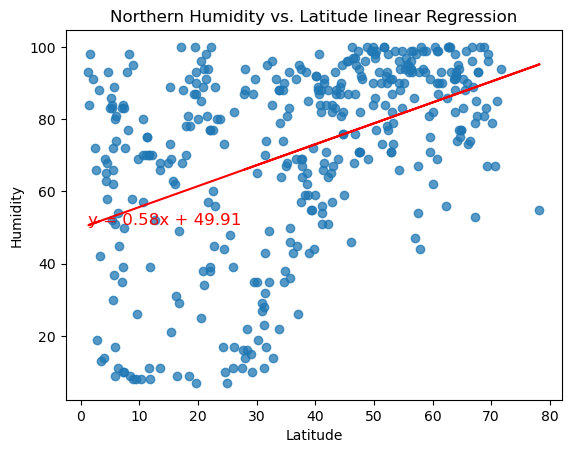

In [31]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern_humidity = northern_hemi_df["Humidity"]
# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values_northern, y_values_northern_humidity)
regression_line = slope * x_values_northern + intercept

# Create scatter plot
plt.scatter(x_values_northern, y_values_northern_humidity, marker="o", alpha=0.75)
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot regression line in red
plt.plot(x_values_northern, regression_line, "r")

# Incorporate the other graph properties
plt.text(x_values_northern.min(), regression_line.min(), equation, fontsize=12, color="red")
plt.title("Northern Humidity vs. Latitude linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# Print r value
print(f"The r-value is: {r_value**2}")
plt.show()

The r-value is: 0.037354376969287666


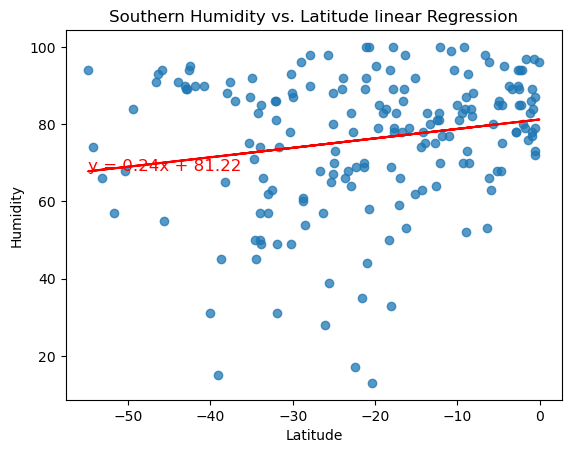

In [32]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern_temperature = southern_hemi_df["Humidity"]
# Perform Linear regression on Southern Hemisphere
(slope, intercept, r_value, p_value, std_err) = linregress(x_values_southern, y_values_southern_temperature)
regression_line = slope * x_values_southern + intercept

# Create scatter plot
plt.scatter(x_values_southern, y_values_southern_temperature, marker="o", alpha=0.75)
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot regression line in red
plt.plot(x_values_southern, regression_line, "r")

# Plot_linear_regression function
plot_linear_regression(x_values_southern, y_values_southern_temperature, "Latitude", "Max Temperature (F)", "Southern Hemisphere - Temperature vs. Latitude", (0, -20))

# Incorporate the other graph properties
plt.text(x_values_southern.min(), regression_line.min(), equation, fontsize=12, color="red")
plt.title("Southern Humidity vs. Latitude linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# Print r value
print(f"The r-value is: {r_value**2}")
plt.show()

1. ***Northern Hemisphere Humidity ):***
   - **Linear Regression Equation:**  y = 0.58x + 49.91
   - **Correlation (r-value):** 0.19734773121271182

   The positive coefficient (0.58) in the Northern Hemisphere indicates a positive relationship between humidity and latitude. The correlation coefficient (0.1973) suggests a weak positive correlation. In other words, as you move towards higher latitudes in the Northern Hemisphere, there is a slight tendency for humidity to increase. 

2. ***Southern Hemisphere Humidity :***
   - **Linear Regression Equation:**  y = 0.24x + 81.22 
   - **Correlation (r-value):** 0.037354376969287666

   The positive coefficient (0.24) in the Southern Hemisphere also indicates a positive relationship between humidity and latitude. However, the correlation coefficient (0.0373) is very close to zero, suggesting an extremely weak positive correlation. In the Southern Hemisphere, the relationship between humidity and latitude appears to be very weak, and latitude alone may not be a good predictor of humidity.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07356061151763249


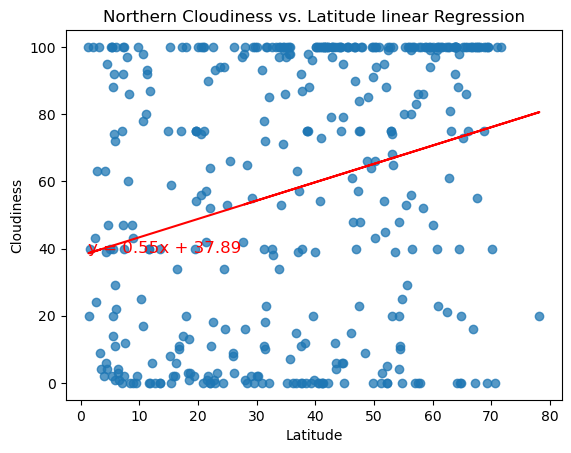

In [33]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern_cloudiness = northern_hemi_df["Cloudiness"]
# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values_northern, y_values_northern_cloudiness)
regression_line = slope * x_values_northern + intercept

# Create scatter plot
plt.scatter(x_values_northern, y_values_northern_cloudiness, marker="o", alpha=0.75)
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot regression line in red
plt.plot(x_values_northern, regression_line, "r")

# Incorporate the other graph properties
plt.text(x_values_northern.min(), regression_line.min(), equation, fontsize=12, color="red")
plt.title("Northern Cloudiness vs. Latitude linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# Print r value
print(f"The r-value is: {r_value**2}")
plt.show()

The r-value is: 0.07962564278046327


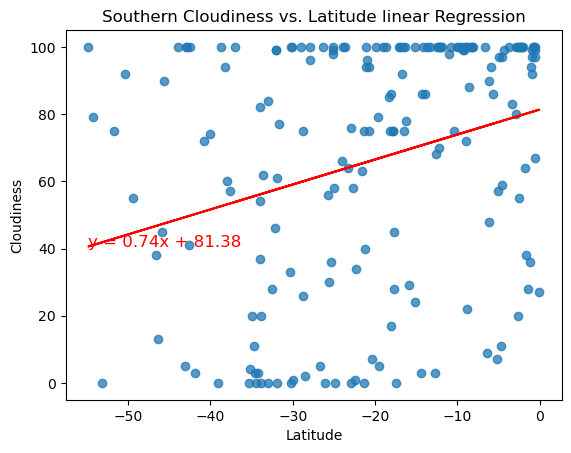

In [34]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern_cloudiness = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values_southern, y_values_southern_cloudiness)
regression_line = slope * x_values_southern + intercept

# Create scatter plot
plt.scatter(x_values_southern, y_values_southern_cloudiness, marker="o", alpha=0.75)
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot regression line in red
plt.plot(x_values_southern, regression_line, "r")

# Plot_linear_regression function
plot_linear_regression(x_values_southern, y_values_southern_cloudiness, "Latitude", "Cloudiness", "Southern Hemisphere - Cloudiness vs. Latitude", (0, -20))

# Incorporate the other graph properties
plt.text(x_values_southern.min(), regression_line.min(), equation, fontsize=12, color="red")
plt.title("Southern Cloudiness vs. Latitude linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# Print r value
print(f"The r-value is: {r_value**2}")
plt.show()

***1. Northern Hemisphere Cloudiness:***
- **Linear Regression Equation: y = 0.55x + 37.89** 
- **Correlation(r-value):0.07356061151763249**
The linear regression equation for the Northern Hemisphere suggests that there is a positive relationship between cloudiness and latitude.  However, the low r-value (0.07356) indicates a very weak correlation. This suggests that latitude alone might not be a strong predictor of cloudiness in the Northern Hemisphere, or other factors may also influence cloudiness.

***2.  Southern Hemisphere Cloudiness:***
- **Linear Regression Equation: y = 0.74x + 81.38**
- **Correlation(r-value):0.07962564278046327**
In the Southern Hemisphere, the linear regression equation indicates a positive relationship as well. However, similar to the Northern Hemisphere, the r-value (0.07962) is quite low, suggesting a weak correlation. This implies that latitude alone may not be a robust predictor of cloudiness in the Southern Hemisphere, or there could be other factors at play.

***Overall:***
Both hemispheres show a positive relationship between cloudiness and latitude, suggesting a general trend of increased cloudiness with higher latitudes. However, the weak r-values indicate that latitude alone may not explain a substantial proportion of the variation in cloudiness. Other factors, such as local geography, weather patterns, and seasonal variations, may contribute to cloudiness levels.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.021019447756163902


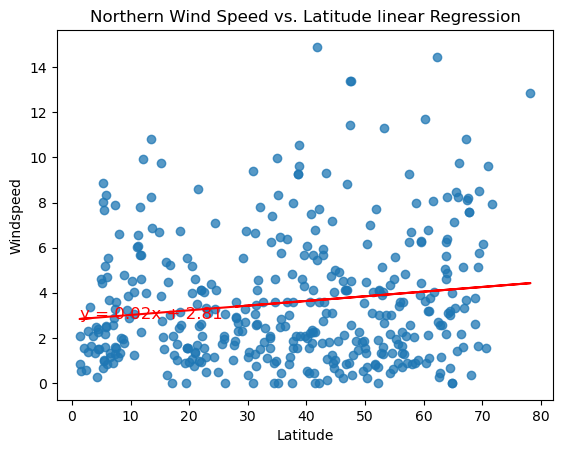

In [35]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern_windspeed = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values_northern, y_values_northern_windspeed)
regression_line = slope * x_values_northern + intercept

# Create scatter plot
plt.scatter(x_values_northern, y_values_northern_windspeed, marker="o", alpha=0.75)
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot regression line in red
plt.plot(x_values_northern, regression_line, "r")



# Incorporate the other graph properties
plt.text(x_values_northern.min(), regression_line.min(), equation, fontsize=12, color="red")
plt.title("Northern Wind Speed vs. Latitude linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
# Print r value
print(f"The r-value is: {r_value**2}")
plt.show()

The r-value is: 0.0609885253041922


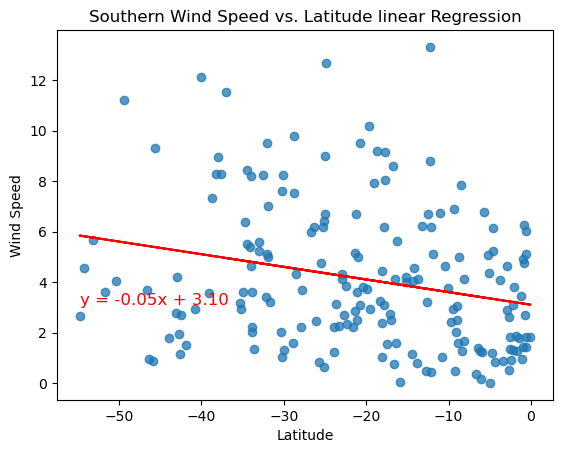

In [36]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern_windspeed = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values_southern, y_values_southern_windspeed)
regression_line = slope * x_values_southern + intercept

# Create scatter plot
plt.scatter(x_values_southern, y_values_southern_windspeed, marker="o", alpha=0.75)
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot regression line in red
plt.plot(x_values_southern, regression_line, "r")

# Plot_linear_regression function
plot_linear_regression(x_values_southern, y_values_southern_windspeed, "Latitude", "Wind Speed", "Southern Hemisphere - Wind Speed vs. Latitude", (0, -20))

# Incorporate the other graph properties
plt.text(x_values_southern.min(), regression_line.min(), equation, fontsize=12, color="red")
plt.title("Southern Wind Speed vs. Latitude linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Print r value
print(f"The r-value is: {r_value**2}")
plt.show()

***1. Northern Hemisphere Wind Speed:***
- **Regression Equation:** y = 0.02x + 2.81
- **Correlation Coefficient (r-value):** 0.021019447756163902

The extremely low correlation coefficient (close to zero) suggests that there is almost no linear relationship between wind speed and latitude in the Northern Hemisphere. The regression equation also has a very small slope (0.02), indicating a negligible change in wind speed with increasing latitude.

***Southern Hemisphere Wind Speed:***
- **Regression Equation:** y = -0.03x + 3.10
- **Correlation Coefficient (r-value):** 0.0609885253041922

Similar to the Northern Hemisphere, the Southern Hemisphere also shows a very weak correlation between wind speed and latitude, as indicated by the low correlation coefficient. The negative slope in the regression equation (-0.03) suggests a slight decrease in wind speed with increasing latitude, but the effect is small.